# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(rate = 0.25)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam] 

In [9]:
import itertools
results = {}
for lr, opt in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opt)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opt(lr=lr)
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
 # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opt))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
___________________________________________________

50000/50000 [==============================] - 7s 140us/step - loss: 0.2196 - accuracy: 0.9160 - val_loss: 0.2214 - val_accuracy: 0.9148
Epoch 44/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2192 - accuracy: 0.9159 - val_loss: 0.2319 - val_accuracy: 0.9132
Epoch 45/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.2181 - accuracy: 0.9164 - val_loss: 0.2421 - val_accuracy: 0.9079
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2170 - accuracy: 0.9168 - val_loss: 0.2153 - val_accuracy: 0.9171
Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.2155 - accuracy: 0.9176 - val_loss: 0.2179 - val_accuracy: 0.9166
Epoch 48/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.2148 - accuracy: 0.9178 - val_loss: 0.2488 - val_accuracy: 0.9095
Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.2146 - accuracy: 0.9177 - val_loss:

50000/50000 [==============================] - 8s 167us/step - loss: 2.7661 - accuracy: 0.8201 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 36/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.7697 - accuracy: 0.8199 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 37/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.7646 - accuracy: 0.8202 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 38/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.7692 - accuracy: 0.8199 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 39/50
50000/50000 [==============================] - 9s 170us/step - loss: 2.7706 - accuracy: 0.8198 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 40/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.7676 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 41/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.7703 - accuracy: 0.8199 - val_loss:

50000/50000 [==============================] - 8s 154us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 28/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 29/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 30/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 31/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 32/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 33/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.7682 - accuracy: 0.8200 - val_loss:

50000/50000 [==============================] - 7s 143us/step - loss: 2.7670 - accuracy: 0.8201 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 20/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.7671 - accuracy: 0.8201 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 21/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.7759 - accuracy: 0.8195 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 22/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.7695 - accuracy: 0.8199 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 23/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.7703 - accuracy: 0.8199 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 24/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.7701 - accuracy: 0.8199 - val_loss: 2.7682 - val_accuracy: 0.8200
Epoch 25/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.7710 - accuracy: 0.8198 - val_loss:

50000/50000 [==============================] - 5s 108us/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3235 - val_accuracy: 0.9000
Epoch 12/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3234 - val_accuracy: 0.9000
Epoch 13/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3232 - val_accuracy: 0.9000
Epoch 14/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.3250 - accuracy: 0.9000 - val_loss: 0.3230 - val_accuracy: 0.9000
Epoch 15/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.3247 - accuracy: 0.9000 - val_loss: 0.3229 - val_accuracy: 0.9000
Epoch 16/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.3246 - accuracy: 0.9000 - val_loss: 0.3227 - val_accuracy: 0.9000
Epoch 17/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.3246 - accuracy: 0.9000 - val_loss:

50000/50000 [==============================] - 6s 123us/step - loss: 0.2794 - accuracy: 0.9012 - val_loss: 0.2881 - val_accuracy: 0.9022
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2721 - accuracy: 0.9023 - val_loss: 0.2782 - val_accuracy: 0.9015
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2652 - accuracy: 0.9036 - val_loss: 0.2590 - val_accuracy: 0.9040
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.2609 - accuracy: 0.9045 - val_loss: 0.2518 - val_accuracy: 0.9074
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.2556 - accuracy: 0.9059 - val_loss: 0.2593 - val_accuracy: 0.9046
Epoch 8/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.2524 - accuracy: 0.9067 - val_loss: 0.2607 - val_accuracy: 0.9037
Epoch 9/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.2484 - accuracy: 0.9075 - val_loss: 0.258

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.3037 - accuracy: 0.9001 - val_loss: 0.2846 - val_accuracy: 0.9007
Epoch 2/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.2853 - accuracy: 0.9004 - val_loss: 0.2776 - val_accuracy: 0.9022
Epoch 3/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.2767 - accuracy: 0.9012 - val_loss: 0.2678 - val_accuracy: 0.9029
Epoch 4/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.2710 - accuracy: 0.9022 - val_loss: 0.2610 - val_accuracy: 0.9042
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.2665 - accuracy: 0.9028 - val_loss: 0.2544 - val_accuracy: 0.9059
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2632 - accuracy: 0.9034 - val_loss: 0.2510 - val_accuracy: 0.9066
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2970 - accuracy: 0.9002 - val_loss: 0.2729 - val_accuracy: 0.9018
Epoch 2/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.2730 - accuracy: 0.9020 - val_loss: 0.2589 - val_accuracy: 0.9043
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.2612 - accuracy: 0.9040 - val_loss: 0.2531 - val_accuracy: 0.9061
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.2537 - accuracy: 0.9059 - val_loss: 0.2423 - val_accuracy: 0.9084
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.2476 - accuracy: 0.9073 - val_loss: 0.2393 - val_accuracy: 0.9096
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2425 - accuracy: 0.9088 - val_loss: 0.2376 - val_accuracy: 0.9111
Epoch 7/50
50000/50000 [==============================] - 7s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.3288 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.3286 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.3289 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.3286 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.3287 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.3285 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 7/50
50000/50000 [==============================] - 5s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.3234 - accuracy: 0.9000 - val_loss: 0.3160 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.3156 - accuracy: 0.9000 - val_loss: 0.3057 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.3075 - accuracy: 0.9001 - val_loss: 0.2963 - val_accuracy: 0.9003
Epoch 4/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.3014 - accuracy: 0.9003 - val_loss: 0.2896 - val_accuracy: 0.9011
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.2966 - accuracy: 0.9005 - val_loss: 0.2851 - val_accuracy: 0.9014
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.2925 - accuracy: 0.9004 - val_loss: 0.2812 - val_accuracy: 0.9019
Epoch 7/50
50000/50000 [==============================] - 6s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.3268 - accuracy: 0.9000 - val_loss: 0.3236 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3228 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.3244 - accuracy: 0.9000 - val_loss: 0.3223 - val_accuracy: 0.9000
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.3239 - accuracy: 0.9000 - val_loss: 0.3218 - val_accuracy: 0.9000
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.3236 - accuracy: 0.9000 - val_loss: 0.3215 - val_accuracy: 0.9000
Epoch 6/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.3231 - accuracy: 0.9000 - val_loss: 0.3211 - val_accuracy: 0.9000
Epoch 7/50
50000/50000 [==============================] - 5s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.3229 - accuracy: 0.9000 - val_loss: 0.3146 - val_accuracy: 0.9000
Epoch 2/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.3131 - accuracy: 0.9000 - val_loss: 0.3021 - val_accuracy: 0.9000
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.3042 - accuracy: 0.9000 - val_loss: 0.2929 - val_accuracy: 0.9002
Epoch 4/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.2973 - accuracy: 0.9001 - val_loss: 0.2854 - val_accuracy: 0.9007
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.2918 - accuracy: 0.9002 - val_loss: 0.2799 - val_accuracy: 0.9015
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.2873 - accuracy: 0.9005 - val_loss: 0.2761 - val_accuracy: 0.9018
Epoch 7/50
50000/50000 [==============================] - 7s 1

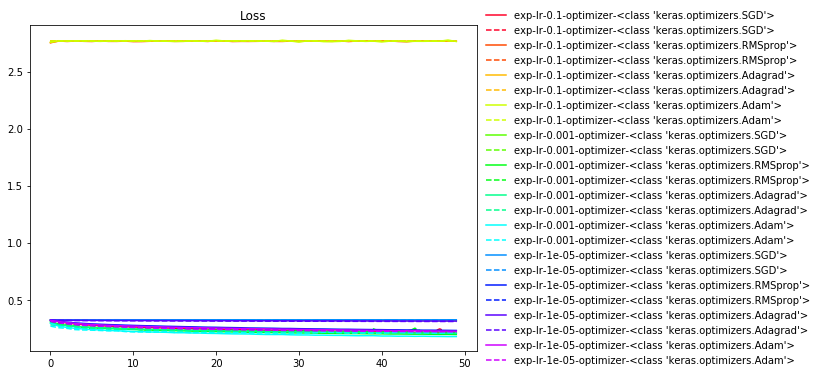

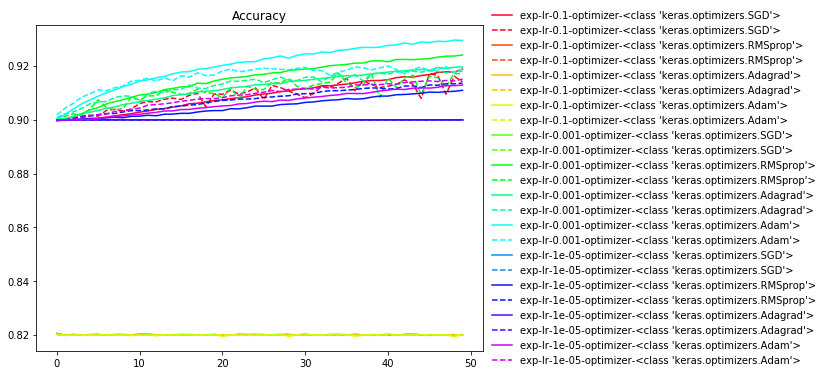

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#figure()
#ax = gca()
#ax.set_position([0,0,0.8,1])

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False) #plt.legend(loc='best',frameon=False)
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

## 結論 : 優化器Adam配合學習速率0.001表現最佳, 驗證準確率為91.89%; 學習速率0.1表現最差, 只有以SGD為優化器才能改善.